In [1]:
import tensorflow
from tensorflow import keras

In [2]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
 num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [3]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
 [(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join(
 [reverse_word_index.get(i - 3, "?") for i in train_data[0]]) 

550378/550378 [==============================] - 0s 0us/step


In [5]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [6]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [8]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [10]:
from tensorflow.keras import layers
model = keras.Sequential([
 layers.Dense(64, activation="relu"),
 layers.Dense(64, activation="relu"),
 layers.Dense(46, activation="softmax")
])

In [11]:
model.compile(optimizer="rmsprop",
 loss="categorical_crossentropy",
 metrics=["accuracy"])


In [12]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [13]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 52ms/step - loss: 2.8900 - accuracy: 0.4935 - val_loss: 1.9783 - val_accuracy: 0.6430
Epoch 2/20
16/16 [==============================] - 0s 24ms/step - loss: 1.6218 - accuracy: 0.6810 - val_loss: 1.4222 - val_accuracy: 0.6850
Epoch 3/20
16/16 [==============================] - 0s 27ms/step - loss: 1.2306 - accuracy: 0.7290 - val_loss: 1.2305 - val_accuracy: 0.7210
Epoch 4/20
16/16 [==============================] - 0s 27ms/step - loss: 1.0111 - accuracy: 0.7745 - val_loss: 1.0945 - val_accuracy: 0.7510
Epoch 5/20
16/16 [==============================] - 0s 26ms/step - loss: 0.8383 - accuracy: 0.8143 - val_loss: 1.0130 - val_accuracy: 0.7720
Epoch 6/20
16/16 [==============================] - 0s 24ms/step - loss: 0.7058 - accuracy: 0.8448 - val_loss: 0.9423 - val_accuracy: 0.7910
Epoch 7/20
16/16 [==============================] - 0s 28ms/step - loss: 0.5930 - accuracy: 0.8708 - val_loss: 0.9131 - val_accuracy: 0.8020
Epoch 8/20
16

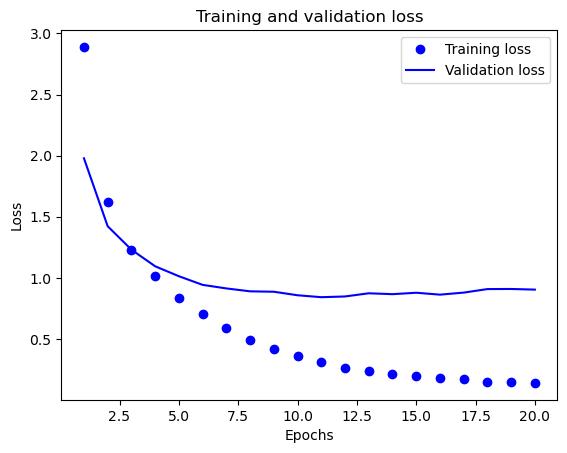

In [14]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

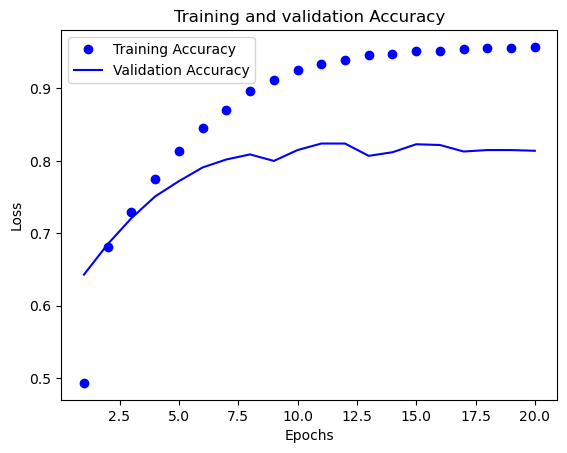

In [15]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
acc=history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training Accuracy")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
plt.title("Training and validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [16]:
model = keras.Sequential([
 layers.Dense(64, activation="relu"),
 layers.Dense(64, activation="relu"),
 layers.Dense(46, activation="softmax")
])

In [17]:
model.compile(optimizer="rmsprop",
 loss="categorical_crossentropy",
 metrics=["accuracy"])

In [18]:
model.fit(x_train,
 y_train,
 epochs=9,
 batch_size=512)

Epoch 1/9
18/18 [==============================] - 1s 23ms/step - loss: 2.5246 - accuracy: 0.5219
Epoch 2/9
18/18 [==============================] - 0s 23ms/step - loss: 1.4415 - accuracy: 0.6904
Epoch 3/9
18/18 [==============================] - 0s 24ms/step - loss: 1.0957 - accuracy: 0.7660
Epoch 4/9
18/18 [==============================] - 0s 21ms/step - loss: 0.8777 - accuracy: 0.8157
Epoch 5/9
18/18 [==============================] - 0s 22ms/step - loss: 0.7159 - accuracy: 0.8471
Epoch 6/9
18/18 [==============================] - 0s 20ms/step - loss: 0.5794 - accuracy: 0.8772
Epoch 7/9
18/18 [==============================] - 0s 21ms/step - loss: 0.4829 - accuracy: 0.8962
Epoch 8/9
18/18 [==============================] - 0s 20ms/step - loss: 0.4063 - accuracy: 0.9115
Epoch 9/9
18/18 [==============================] - 0s 25ms/step - loss: 0.3409 - accuracy: 0.9260


In [19]:
results = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 2ms/step - loss: 0.9030 - accuracy: 0.7890
